# House Prices

In this project, we use data from a **Kaggle** competition. The problem is to predict the price of houses in Ames, Iowa. The discription bellow is from Kaggle webpage: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

"Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

Practice Skills
- Creative feature engineering 
- Advanced regression techniques like random forest and gradient boosting"

### Importing Required Libraries

In [94]:
import warnings
warnings.filterwarnings('ignore')

import os #provides functions for interacting with the operating system
import seaborn as sns
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

from sklearn.impute import SimpleImputer #to replace missing values with the mean value or other strategies along each column.
from sklearn.preprocessing import OrdinalEncoder #to encode categorical variables with numbers
from sklearn.preprocessing import OneHotEncoder 
# We set handle_unknown='ignore' to avoid errors when the validation data contains classes that aren't represented in the training data, and
# setting sparse=False ensures that the encoded columns are returned as a numpy array (instead of a sparse matrix).

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer # to bundle together different preprocessing steps.
from sklearn.pipeline import Pipeline # bundles together preprocessing and modeling steps
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
# , StackingRegressor
from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor

from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error, mean_squared_log_error



sns.set_style('darkgrid')
# Increases the size of sns plots
# sns.set(rc={'figure.figsize':(12,10)})

## 1. Loading the Data

In [95]:
#load the data

train_data = pd.read_csv('C:\\Users\\faezeh\\Dropbox\\Data_Science\\Data\\House_Price_Prediction\\train.csv')
valid_data = pd.read_csv('C:\\Users\\faezeh\\Dropbox\\Data_Science\\Data\\House_Price_Prediction\\test.csv')
sample_submission = pd.read_csv('C:\\Users\\faezeh\\Dropbox\\Data_Science\\Data\\House_Price_Prediction\\sample_submission.csv')

print(train_data.shape)
print(valid_data.shape)
print(sample_submission.shape)

train_data.head()

(1460, 81)
(1459, 80)
(1459, 2)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [93]:
valid_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [96]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

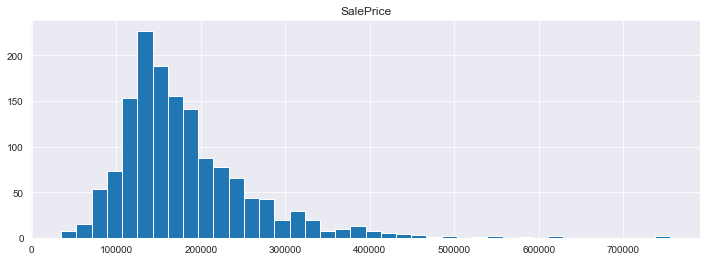

In [97]:
# let's see the distribution of our target, 'SalePrice'

train_data.hist("SalePrice", bins = 40, figsize = (12,4))
plt.show()

In [5]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## 2. Data Preprocessing

### 2.1. Exploratory Data Analysis

#### 2.1.1 Missing Values

Based on the info, we can see that we have 3 features with float dtype, 35 features with dtype int, and 43 features are objects. First, I am going to remove **Id**, because we do not need it. Then I will explore the numerical and categorical columns to find out missing values.

In [98]:
# remove Id
train_data = train_data.drop(columns = ['Id'])
valid_data = valid_data.drop(columns = ['Id'])

In [99]:
train_data.head()
# valid_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Checking for missing values in train_data

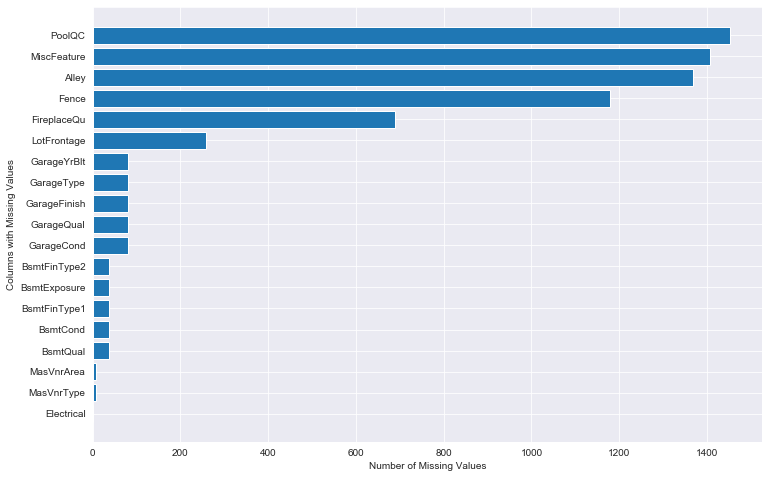

LotFrontage-------------------: 259 (17.74%)
Alley-------------------------: 1369 (93.77%)
MasVnrType--------------------: 8 (0.55%)
MasVnrArea--------------------: 8 (0.55%)
BsmtQual----------------------: 37 (2.53%)
BsmtCond----------------------: 37 (2.53%)
BsmtExposure------------------: 38 (2.60%)
BsmtFinType1------------------: 37 (2.53%)
BsmtFinType2------------------: 38 (2.60%)
Electrical--------------------: 1 (0.07%)
FireplaceQu-------------------: 690 (47.26%)
GarageType--------------------: 81 (5.55%)
GarageYrBlt-------------------: 81 (5.55%)
GarageFinish------------------: 81 (5.55%)
GarageQual--------------------: 81 (5.55%)
GarageCond--------------------: 81 (5.55%)
PoolQC------------------------: 1453 (99.52%)
Fence-------------------------: 1179 (80.75%)
MiscFeature-------------------: 1406 (96.30%)


In [100]:
# checking for missing values in train data
missing_vals = train_data.isnull().sum() 


# sorting only columns with missing values, based on their values
missing_vals = missing_vals[missing_vals > 0]
missing_vals_cols = [col for col in train_data.columns if train_data[col].isnull().sum() > 0]
missing_data = pd.DataFrame(list(zip(missing_vals_cols, missing_vals.tolist())), columns = ['column_name', 'values'])
missing_data.sort_values('values', inplace = True)

# bar plot of missing values
plt.figure(figsize=(12,8))
plt.barh(missing_data['column_name'], missing_data['values'])
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns with Missing Values')
plt.show()

#Detailed overview of missing values:      
train_data_missing = []
for col in train_data.columns:
    if train_data[col].isna().sum() != 0:
        missing = train_data[col].isna().sum()
        print(f"{col:-<{30}}: {missing} ({missing / train_data.shape[0] * 100:.2f}%)")
        if missing > train_data.shape[0] * .8:
            train_data_missing.append(col)

#### Checking for missing values in valid_data

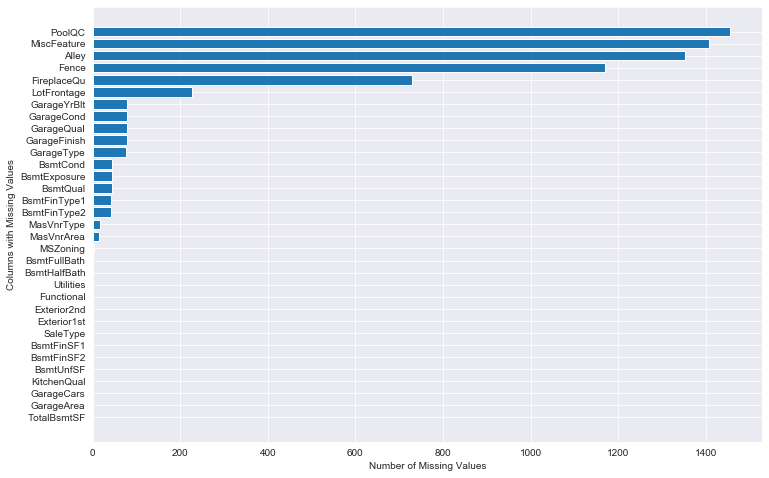

MSZoning----------------------: 4 (0.27%)
LotFrontage-------------------: 227 (15.56%)
Alley-------------------------: 1352 (92.67%)
Utilities---------------------: 2 (0.14%)
Exterior1st-------------------: 1 (0.07%)
Exterior2nd-------------------: 1 (0.07%)
MasVnrType--------------------: 16 (1.10%)
MasVnrArea--------------------: 15 (1.03%)
BsmtQual----------------------: 44 (3.02%)
BsmtCond----------------------: 45 (3.08%)
BsmtExposure------------------: 44 (3.02%)
BsmtFinType1------------------: 42 (2.88%)
BsmtFinSF1--------------------: 1 (0.07%)
BsmtFinType2------------------: 42 (2.88%)
BsmtFinSF2--------------------: 1 (0.07%)
BsmtUnfSF---------------------: 1 (0.07%)
TotalBsmtSF-------------------: 1 (0.07%)
BsmtFullBath------------------: 2 (0.14%)
BsmtHalfBath------------------: 2 (0.14%)
KitchenQual-------------------: 1 (0.07%)
Functional--------------------: 2 (0.14%)
FireplaceQu-------------------: 730 (50.03%)
GarageType--------------------: 76 (5.21%)
GarageYrBlt-----

In [101]:
# checking for missing values in validation set
missing_vals = valid_data.isnull().sum() 


# sorting only columns with missing values, based on their values
missing_vals = missing_vals[missing_vals > 0]
missing_vals_cols = [col for col in valid_data.columns if valid_data[col].isnull().sum() > 0]
missing_data = pd.DataFrame(list(zip(missing_vals_cols, missing_vals.tolist())), columns = ['column_name', 'values'])
missing_data.sort_values('values', inplace = True)

# bar plot of missing values
plt.figure(figsize=(12,8))
plt.barh(missing_data['column_name'], missing_data['values'])
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns with Missing Values')
plt.show()

#Detailed overview of missing values:      
valid_data_missing = []
for col in valid_data.columns:
    if valid_data[col].isna().sum() != 0:
        missing = valid_data[col].isna().sum()
        print(f"{col:-<{30}}: {missing} ({missing / valid_data.shape[0] * 100:.2f}%)")
        if missing > valid_data.shape[0] * .8:
            valid_data_missing.append(col)

In [102]:
# checking the columns with over 80% missing values
print(train_data_missing)

# checking if the columns are the same in train and validation sets
print(train_data_missing == valid_data_missing)

['Alley', 'PoolQC', 'Fence', 'MiscFeature']
True


I plan to drop the columns with missing values more than 80% before preprocessing in `Pipeline`, and use `SimpleImputer` in `Pipeline` to fill in the rest of missing values. 
Now, Let's check the number of unique values in each column.

#### 2.1.2 Number of Unique Values

We refer to the number of unique entries of a categorical variable as the **cardinality** of that categorical variable. We should be looking for:
- High Cardinality Categorical Variables: for example, if Zipcodes were not stored as numbers, it could cause a Transformer like OneHotEncoder to explode.
- Low Cardinality Numeric Variables: for instance, if a feature had values [1,2,3,4,5], we could create new useful features out of it.

In [103]:
# selecting numerical columns
num_columns = [col for col in train_data.columns if train_data[col].dtype in ['float64', 'int64']]

# selecting categorical columns
cat_columns = [col for col in train_data.columns if train_data[col].dtype == 'object']

# visualize unique values in categorical columns
print('Number of Unique Values in each Feature')
print('--'*20)
for col in cat_columns:
    unique_vals = train_data[col].unique()
    if len(unique_vals) < 10:
        print(f"{len(unique_vals)} values in {col}: {unique_vals}")
    else:
        print(f"{len(unique_vals)} values in {col}")


Number of Unique Values in each Feature
----------------------------------------
5 values in MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
2 values in Street: ['Pave' 'Grvl']
3 values in Alley: [nan 'Grvl' 'Pave']
4 values in LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
4 values in LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
2 values in Utilities: ['AllPub' 'NoSeWa']
5 values in LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
3 values in LandSlope: ['Gtl' 'Mod' 'Sev']
25 values in Neighborhood
9 values in Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
8 values in Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
5 values in BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
8 values in HouseStyle: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
6 values in RoofStyle: ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
8 values in RoofMatl: ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
15

#### 2.1.3 Checking for Feature Correlation

Now, let's explore the **Linear Correlation** between features. It can help to
- Highlight which features look to be the most useful for predicting the target variable.
- Shed some light on which features are highly correlated together in which case they could be mutually redundant (this helps in Feature Selection)

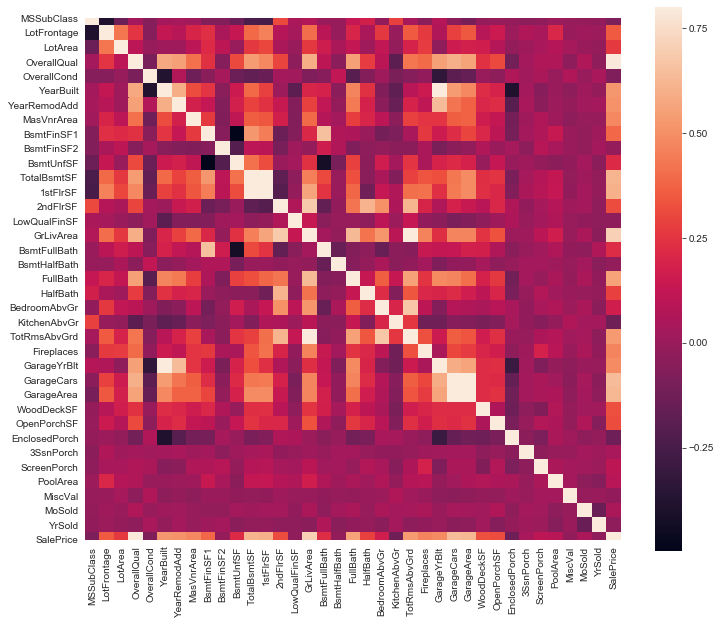

In [104]:
# create correlation matrix
corr_matrix = train_data.corr()
fig = plt.figure(figsize = (12,10))
sns.heatmap(corr_matrix, vmax = .8, square = True)
plt.show()

We can see that the two features `OverallQual` and `GrLivArea` are the most linearly correlated with our target so we can choose to explore them a bit further. For example, let's see the scatter plot of `OverallQual` and the `SalePrice`.

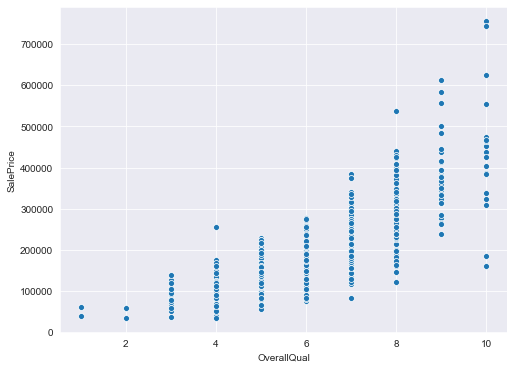

In [105]:
# exploring the linear correlation
fig = plt.figure(figsize = (8,6))
sns.scatterplot(x = "OverallQual", y = "SalePrice", data = train_data)

We can clearly see that `OverallQual` and the target are highly correlated.

#### 2.1.4 Outliers

Extreme values can be present in both dependent & independent variables, in the case of supervised learning methods. Dropping data is always a harsh step and should be taken only in extreme conditions when we’re very sure that the outlier is a measurement error, which we generally do not know. The data collection process is rarely provided. When we drop data, we lose information in terms of the variability in data. When we have too many observations and outliers are few, then we can think of dropping these observations. https://heartbeat.fritz.ai/how-to-make-your-machine-learning-models-robust-to-outliers-44d404067d07

Some ways to deal with such distributions are to:

- Perform a logarithmic transformation on the values. It’s often preferred when the response variable follows exponential distribution or is right-skewed.
- Explore the Percentiles to come up with some upper/lower thresholds beyond which the values are set to something more common (Boxplots also help here)

If we take a look at the distribution of our target, we can see that it is **right-skewed**.
We use a Log Transform here: it is simple and the resulting distribution is visually very similar to a Gaussian.

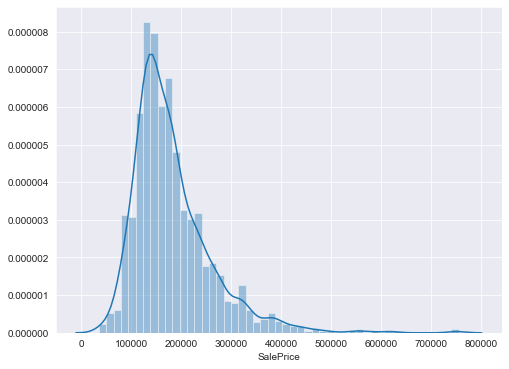

In [106]:
# exploring the Distribution of the Target Variable
fig = plt.figure(figsize = (8,6))
sns.distplot(train_data['SalePrice'])
plt.show()

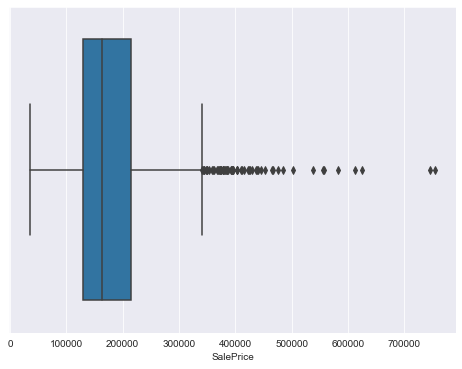

In [107]:
# Using Boxplot to see the outliers in the target
fig = plt.figure(figsize = (8,6))
g = sns.boxplot(x = "SalePrice", data = train_data)

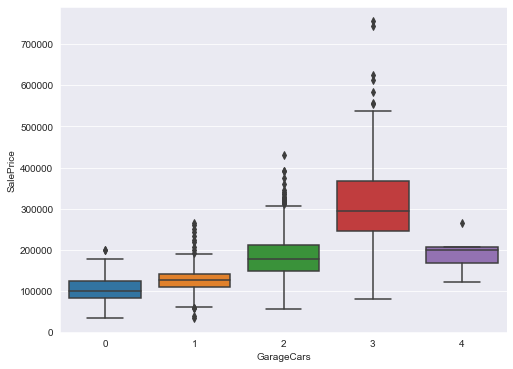

In [108]:
# Using Boxplot to see the outliers in other features
fig = plt.figure(figsize = (8,6))
# g = sns.boxplot(x = "OverallQual",y = "SalePrice", data = train_data)
g = sns.boxplot(x = "GarageCars",y = "SalePrice", data = train_data)

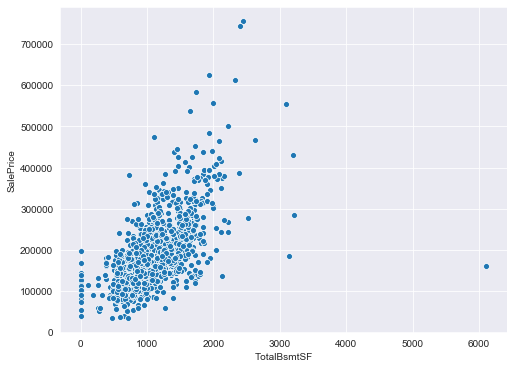

In [109]:
# Just to see outliers in other variables
fig = plt.figure(figsize = (8,6))
sns.scatterplot(x = "TotalBsmtSF", y = "SalePrice", data = train_data)

In [110]:
# let's see the discription of the target again
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

We see that 75% of observations are 214000 and the maximum price is 755000. We can say that we have outliers because most of the observations have smaller value than the max value.

#### This is how using percentile works

36499.350999999995
442567.0100000005


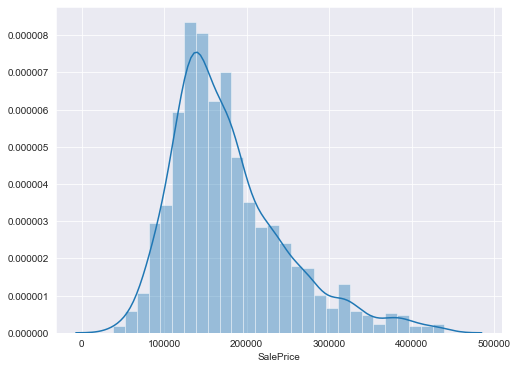

In [111]:
# Using Percentile to define threshhold

min_thresh, max_thresh = train_data['SalePrice'].quantile([0.001, 0.99])

print(min_thresh)
print(max_thresh)

# # outlier observations
# train_data[(train_data.SalePrice > max_thresh) | (train_data.SalePrice < min_thresh)]

# let's check the distribution without outliers
df = train_data[(train_data.SalePrice < max_thresh) & (train_data.SalePrice > min_thresh)] 

fig = plt.figure(figsize = (8,6))
sns.distplot(df['SalePrice'])
plt.show()

We can see that the distribution is less skewed after we removed the outliers.

#### We will be using Log-Transfor to deal with outliers

`scipy.stats.skew`
For normally distributed data, the skewness should be about zero. For unimodal continuous distributions, a skewness value greater than zero means that there is more weight in the right tail of the distribution. The function skewtest can be used to determine if the skewness value is close enough to zero, statistically speaking. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html


`numpy.log1p`
Return the natural logarithm of one plus the input array, element-wise.
Calculates log(1 + x).

In [112]:
# skewness before Log Transform
print(stats.skew(train_data.SalePrice))

# skewness after Log Transform
print(stats.skew(np.log1p(train_data["SalePrice"])))

1.880940746034036
0.12122191311528363


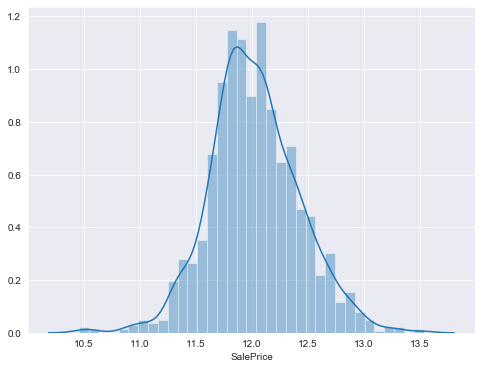

In [113]:
# Distribution after log transform 

fig = plt.figure(figsize = (8,6))
sns.distplot(np.log1p(train_data["SalePrice"]))
plt.show()

### 2.2. Data Cleaning

So far, the only change we made to our original train and validation data sets is that we removed the `Id` column. The rest of things we did were to explore every thing that we need to do before creating our machine learning model. In this section, first, we will creat a copy of our data sets to clean the data and transform categorical features to numerical features to be able to perform feature engineering to select the most important features for our final model. Then, we use `Pipeline` to apply all the data preprocessing in one place for a better, cleaner and reusable model.

#### 2.2.1 Dealing with missing values

In [114]:
# copying the data set into a new data set
df = train_data.copy()

# Dropping columns with lots of missing values
df = df.drop(train_data_missing, axis = 1)


# Preprocessing for numerical data
numeric_columns = [col for col in df.columns if df[col].dtype in ['float64', 'int64']]
numerical_imputer = SimpleImputer(strategy='most_frequent')
num_cols_imputed = pd.DataFrame(numerical_imputer.fit_transform(df[numeric_columns]))


# Preprocessing for categorical data
categoric_columns = [col for col in df.columns if df[col].dtype == 'object']
categorical_imputer = SimpleImputer(strategy='constant')
cat_cals_imputed = pd.DataFrame(categorical_imputer.fit_transform(df[categoric_columns]))

df[numeric_columns] = num_cols_imputed
df[categoric_columns] = cat_cals_imputed

print(df.shape)
df.head()

(1460, 76)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,WD,Normal,208500.0
1,20.0,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,WD,Normal,181500.0
2,60.0,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,WD,Normal,223500.0
3,70.0,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,60.0,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,WD,Normal,250000.0


### 2.3. Feature Engineering
Some aspects of Feature Engineering include:

- Create Aggregated Features (can result in more robust models, as will be seen later)
- Dealing with heavily Skewed features (either dropping them, transforming them or doing nothing)
- Scaling/Normalizing numeric variables (really only required for non-Tree-based algorithms like SVMs, Linear Regression, MLP etc.)
- Encodings for Categorical Variables (the only thing that's necessary to carry out here)

Here, we just perform encoding.

#### 2.3.1 Adding New Features

By exploring the dataset and discreption of the features, and by some visualizations, we can define new features and add the to our dataset.

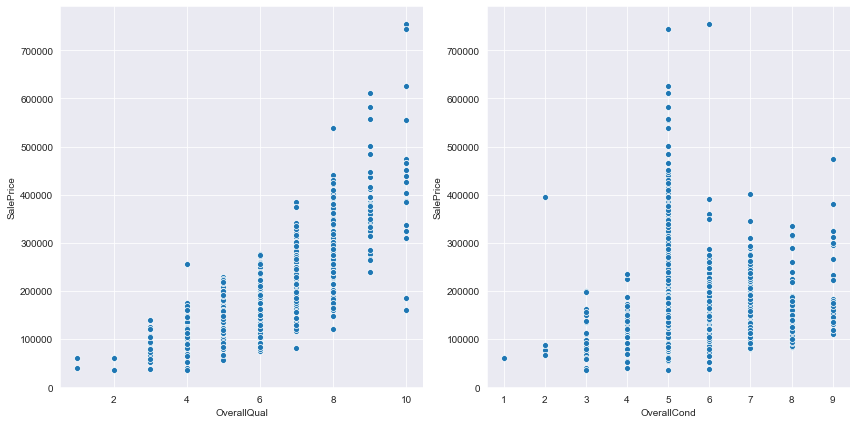

In [115]:
# exploring the correlation
fig = plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.scatterplot(x = "OverallQual", y = "SalePrice", data = df)
plt.subplot(1,2,2)
sns.scatterplot(x = "OverallCond", y = "SalePrice", data = df)
plt.tight_layout()

In [116]:
# adding two new features
def new_features(df):
    df['Overalquality_2'] = df['OverallQual'] **2
    df['TotalQuality'] = df['OverallQual'] + df['OverallCond']
    return df

df = new_features(df)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Overalquality_2,TotalQuality
0,60.0,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,2.0,2008.0,WD,Normal,208500.0,49.0,12.0
1,20.0,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.0,0.0,0.0,5.0,2007.0,WD,Normal,181500.0,36.0,14.0
2,60.0,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,9.0,2008.0,WD,Normal,223500.0,49.0,12.0
3,70.0,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0.0,0.0,0.0,2.0,2006.0,WD,Abnorml,140000.0,49.0,12.0
4,60.0,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.0,0.0,0.0,12.0,2008.0,WD,Normal,250000.0,64.0,13.0


#### 2.3.2 Encoding Categorical Features (One-Hot)

We use the OneHotEncoder class from scikit-learn to get one-hot encodings. There are a number of parameters that can be used to customize its behavior.

- We set handle_unknown='ignore' to avoid errors when the validation data contains classes that aren't represented in the training data, and
- setting sparse=False ensures that the encoded columns are returned as a numpy array (instead of a sparse matrix).

In [117]:
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
cat_cols_encoded = pd.DataFrame(OH_encoder.fit_transform(df[categoric_columns]))

# # One-hot encoding removed index; put it back
cat_cols_encoded.index = df.index

# Remove categorical columns (will replace with one-hot encoding)
df = df.drop(categoric_columns, axis = 1)

# Add one-hot encoded columns to numerical features
df = pd.concat([df, cat_cols_encoded], axis = 1)

print(df.shape)
df.head()

(1460, 290)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,241,242,243,244,245,246,247,248,249,250
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


#### 2.3.3 Feature Selection

2 ways to help us select the important features are:
- Correlation 
- Feature Importance

We saw the correlation matrix earlier. We are going to use Feature Importance to find out the most influential features. However, since our dataset does not contain lots of features, we will use all the feature for our final modeling.

There are many classes made specifically for this making use of tools like Chi-square tests and whatnot, but a simple and effective approach is to simply fit a RandomForest on the data.

The forest is made of many Decision Trees so by iterating through each Tree and seeing which splits contribute to better drops in impurity/entropy, the Ensemble can get an idea of which features are more important for predicting the target. Since the Ensemble is based on Trees, we only have to

- Make sure there are no missing values.
- Numerically Encode the Categorical Variables.

**Steps of Running Feature Importance**
- Split the data into X & y
- Run a Tree-based estimators (i.e. decision trees Or random forests) 
- Run Feature Importance

In [118]:
# spliting the data into independent and dependent features

X = df.drop('SalePrice', axis = 1)
y = df['SalePrice']

In [119]:
# Use a RandomForest model to look at the Feature Importances 

classifier = RandomForestRegressor(n_estimators=100, min_samples_leaf=5, min_samples_split=5, n_jobs=-1)
classifier.fit(X, y)

RandomForestRegressor(min_samples_leaf=5, min_samples_split=5, n_jobs=-1)

In [120]:
# Extract and visualize the importances

feature_importance = pd.Series(classifier.feature_importances_ , index = X.columns)
feature_importance

MSSubClass     0.000951
LotFrontage    0.003642
LotArea        0.010279
OverallQual    0.321370
OverallCond    0.001424
                 ...   
246            0.000000
247            0.000000
248            0.000000
249            0.000168
250            0.000836
Length: 289, dtype: float64

In [121]:
# creating a dataframe from features and their importance value
feature_name = list(X.columns)
feature_importance_df = pd.DataFrame(list(zip(feature_name, feature_importance.tolist())), columns = ['features', 'importance_val'])
feature_importance_df = feature_importance_df.sort_values('importance_val', ascending = False).reset_index()
feature_importance_df

,index,features,importance_val
0,3,OverallQual,0.321370
1,36,Overalquality_2,0.308128
2,15,GrLivArea,0.112517
3,11,TotalBsmtSF,0.038320
4,8,BsmtFinSF1,0.030025
...,...,...,...
284,167,129,0.000000
285,33,MiscVal,0.000000
286,169,131,0.000000
287,58,20,0.000000


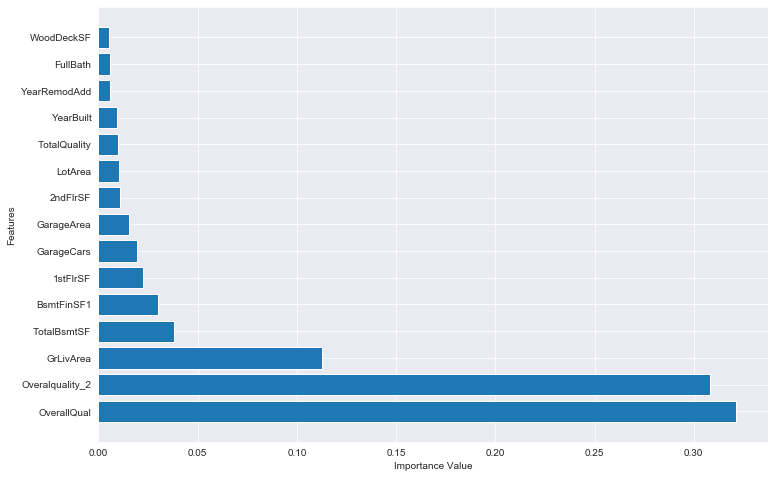

In [122]:
# bar plot of important features
plt.figure(figsize=(12,8))
plt.barh(feature_importance_df['features'][:15], feature_importance_df['importance_val'][:15])
plt.xlabel('Importance Value')
plt.ylabel('Features')
plt.show()

We can see that the two aggregated features are among top 20 important features.

## 3. Pipeline and Modeling

In this section we will build our Pipeline for efficiency and code-reproducibility in case we want to run more experiments later. We will load the data again and perfome some cleaning before creating our pipelines. Then we will compare three different models together, **LinearRegression**, **RandomForest**, and **XGBoost**.

In [123]:
# Loading the data
train_data = pd.read_csv('C:\\Users\\faezeh\\Dropbox\\Data_Science\\Data\\House_Price_Prediction\\train.csv')
valid_data = pd.read_csv('C:\\Users\\faezeh\\Dropbox\\Data_Science\\Data\\House_Price_Prediction\\test.csv')

# removing the Id column
train_data = train_data.drop(columns = ['Id'])
valid_data = valid_data.drop(columns = ['Id'])

# dealing with skewd target
train_data['SalePrice'] = np.log1p(train_data['SalePrice']) # np.expm1(prediction(X_valid)) for retaining the original scale

# separating X and y in 
X_train = train_data.drop(columns = ['SalePrice'])
y_train = train_data['SalePrice']
X_valid = valid_data.copy()
# y_valid = valid_data['SalePrice']

# Data cleaning
X_train = X_train.drop(columns = ['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1) 
X_valid = X_valid.drop(columns = ['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1) 

# Feature Engineering
X_train = new_features(X_train)
X_valid = new_features(X_valid)


numerical_cols = [col for col in X_train.columns if X_train[col].dtype in ['float64', 'int64']]
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

#### Pipleline

In [124]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='most_frequent')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
pipeline = ColumnTransformer(transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_train = pipeline.fit_transform(X_train)
X_valid = pipeline.transform(X_valid) # Making sure to not fit to the testing set

#### Machin Learning Models

In keeping up with proper Cross Validation schemes, we define a function that returns the **RMSE** of a model when validated over 5 folds of the data. This is better than using `train_test_split` since that validates the model on only one fold and is vulnerable to randomness influencing the model's performance.

In [125]:
# Instantiate a dict (+function) for storing model scores
scores = {}
def get_score(estimator): # my_pipeline
    score = -1 * cross_val_score(estimator, X = X_train, y = y_train, cv = 5, scoring='neg_mean_squared_error', n_jobs=-1) 
    return np.sqrt(score)

In [126]:
# Using cross-validation to evaluate different models
   
# Linear Regression
linear_regression = LinearRegression()
scores['Linear_Regression'] = get_score(linear_regression)
    
# SVM with Linear Kernel
linear_svr = SVR(kernel = 'linear', 
                    C = 10, 
                    epsilon = 0.01, 
                    gamma = 0.0005)
scores['linear_svr'] = get_score(linear_svr)

# SVM with RBF kernel
svr = SVR(kernel = 'rbf', 
            C = 10, 
            epsilon = 0.01, 
            gamma = 0.0005)
scores['svr'] = get_score(svr)

# Random Forest
radndom_forest = RandomForestRegressor(n_estimators = 250, 
                        max_depth = 15, 
                        min_samples_leaf = 5, 
                        min_samples_split = 5, 
                        n_jobs=-1,
                        random_state = 42)
scores['radndom_forest'] = get_score(radndom_forest)

# Gradient Boosting
gradient_boost = GradientBoostingRegressor(n_estimators = 350, 
                            learning_rate = 0.1, 
                            loss = 'huber',
                            random_state = 42)
scores['gradient_boost'] = get_score(gradient_boost)

# AdaBoost with DT Base Estimator
adaboost = AdaBoostRegressor(n_estimators=150, 
                        random_state=42)
scores['adaboost'] = get_score(adaboost)

# Ending with XGBoost
xgboost = XGBRegressor(n_estimators=300,
                    max_depth=5, 
                    learning_rate=0.1,
                    random_state=42)
scores['xgboost'] = get_score(xgboost)


# Evaluate models before any serious Hyperparameter tuning
print(f"LinearRegression: {scores['Linear_Regression'].mean()}")
print(f"AdaBoost: {scores['adaboost'].mean()}")
print(f"GradientBoosting: {scores['gradient_boost'].mean()}")
print(f"RandomForest: {scores['radndom_forest'].mean()}")
print(f"Linear SVR: {scores['linear_svr'].mean()}")
print(f"Kernel SVR: {scores['svr'].mean()}")
print(f"XGBoost: {scores['xgboost'].mean()}")

LinearRegression: 0.1584730433009067
AdaBoost: 0.1706364474286112
GradientBoosting: 0.12104261690590146
RandomForest: 0.1446244974303065
Linear SVR: 497.9647118959421
Kernel SVR: 0.39754319255383563
XGBoost: 0.13034918674649018


We can see that Gradient Boosting and then XGBoost have the best scores. We can pick one of these two models and tune its parameters.

## 4. Hyper Parameter Tuning

In this section, we are going to use `RandomizedSearchCV` for tuning the hyper parameters of `XGBoost` and `GradientBoositing` models. we eventually will use `GradientBoosting` model since it resulted a better score for our training data.

In [127]:
# XGBoost classifier
model = XGBRegressor()

# Create the parameter grid
xgb_param_grid = {
    'clf__learning_rate': np.arange(0.05, 0.1, 0.05),
    'clf__max_depth': np.arange(3, 10, 1),
    'clf__n_estimators': np.arange(1000, 6000, 1000)
}

# Perform RandomizedSearchCV with 5 fold cross validation
randomized_scv = RandomizedSearchCV(estimator=model, param_distributions = xgb_param_grid,
                                        n_iter=3, scoring='neg_mean_squared_log_error', cv=5, verbose=1)

# Fit the estimator
randomized_scv.fit(X_train, y_train)

# Compute metrics
score = np.sqrt(-1 * randomized_scv.best_score_)
print('Score: ', score)
print('Estimator: ', randomized_roc_auc.best_estimator_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[22:00:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:00:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:00:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:00:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:00:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:00:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:00:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:00:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:00:12] W

In [143]:
gradientboost = GradientBoostingRegressor(n_estimators=1000)

# Create the parameter grid
grb_param_grid = {
    'learning_rate': [0.001, 0.05, 0.01, 0.1],
    'max_depth': [3,5,7,10],
    'n_estimators': [1000, 2000, 4000, 6000]
}

# Perform RandomizedSearchCV with 5 fold cross validation
random_cv = RandomizedSearchCV(estimator = gradientboost, param_distributions = grb_param_grid,
                                n_iter=3, scoring='neg_mean_squared_log_error', cv=5, verbose=1)

# Fit the estimator
random_cv.fit(X_train, y_train)

# Compute metrics
score = np.sqrt(-1 * random_cv.best_score_)
print('Score: ', score)
print('Estimator: ', random_cv.best_estimator_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Score:  0.009477454387172768
Estimator:  GradientBoostingRegressor(learning_rate=0.01, n_estimators=6000)


## 5. Predicting and Evaluating the Model

Now that we have obtained the best parameters for our `GBoosting` model, we can make the prediction and submit the results to the competition and find out how our model performs comparing to thers.

In [130]:
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=300,
                       max_depth=5,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_valid)
# y_pred = np.floor(np.expm1(xgboost.predict(X_valid)))

# # Evaluate the model
# score = mean_absolute_error(y_valid, y_pred)
# print('MAE:', score)
# print('MSLE:', mean_squared_log_error(y_valid, y_pred))
# print('RMSLE:', np.sqrt(mean_squared_log_error(y_valid, y_pred))) # This is what the competition wants us to submit

[23:54:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [133]:
grb = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)

grb.fit(X_train, y_train)
y_pred = grb.predict(X_valid)

In [134]:
# creating a cvs file of our predicted prices
sample_submission['SalePrice'] = np.floor(np.expm1(y_pred))
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Id,SalePrice
0,1461,124985.0
1,1462,158795.0
2,1463,188651.0
3,1464,196688.0
4,1465,185987.0
5,1466,173736.0
6,1467,171459.0
7,1468,164943.0
8,1469,186220.0
9,1470,126081.0


Our RMSLE score is 0.12250, Top 12%.
Comparing to other submissions score, we did a prety good job in predicting the sale price of houses in Ames, Iowa :)
